In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('data/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.read_csv('data/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Ada dua dataset, yang pertama itu train.csv dan test.csv. data train itu memiliki beberapa kolom yaitu PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked. Sementara itu, data test, memiliki kolom yang hampir sama dengan kolom yang terdapat di data train, perbedaannya adalah data test tidak memiliki kolom Survived.

Tugas kita dalam hal ini adalah memprediksi apakah setiap data yang terdapat di dalam test akan memiliki nilai Survived = 1 (Selamat) atau Survived = 0 (Tidak Selamat)

Sebelum melakukan analisis terhadap data lebih jauh, mengetahui kelengkapan dari data sangatlah penting. Untuk mengetahui banyaknya data secara cepat kita dapat melakukannya dengan cara berikut:

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Secara cepat kita dapat melihat bahwa terdapat 891 data, kolom Age memiliki data yang tidak lengkap karena hanya memiliki 714 data saja. Sedangkan kolom yang lainnya lengkap. Namun disini kolom yang ditampilkan hanyalah kolom yang berisi data numerik saja, sedangkan data yang tidak numerik seperti kolom Name, Ticket, dan Cabin tidak dimunculkan. Kita harus mencari cara lain agar dapat menemukan apakah terdapat data yang kosong pada kolom tersebut. 

In [6]:
#Kita dapat mengatasi masalah tersebut dengan melakukan hal ini
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Dapat dilihat, bahwa kolom Age memiliki data kosong sebanyak 177 data. Kolom Cabin memiliki data yang kosong sangat banyak yaitu 687 data. Sedangkan data Embarked memiliki 2 data yang kosong.

## Feature Analysis

Kita akan menelusuri masing-masing feature(kolom) untuk menentukan feature mana saja yang akan kita gunakan dalam melakukan algoritma sehingga kita dapat memprediksi data test, apakah masing-masing data Survived atau tidak

Tentu saja di sini, feature utama kita adalah Survived. Kolom Survived menjadi feature yang dijadikan patokan apakah, feature yang lain akan dijadikan sebagai feature dalam algoritma nanti atau tidak.

0    549
1    342
Name: Survived, dtype: int64

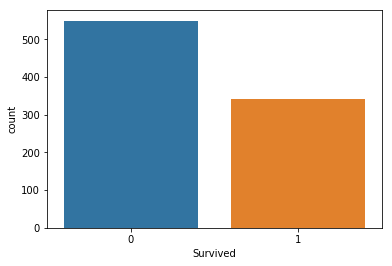

In [7]:
sns.countplot(x='Survived', data=train)
train['Survived'].value_counts()

Mari kita membuat data frame yang akan menjadi dataframe yang berisikan feature-feature yang akan digunakan

In [8]:
selected_df = pd.DataFrame()

In [9]:
selected_df['Survived'] = train['Survived']

### Pclass

Pclass ini merupakan kolom yang menggambarkan kelas dari setiap penumpang di kapal titanic. Terdapat tiga tipe Pclass yaitu 1, 2, dan 3. Mari kita analisis lebih jauh mengenai data Pclass ini.

In [10]:
len(train['Pclass'].unique())

3

3    491
1    216
2    184
Name: Pclass, dtype: int64

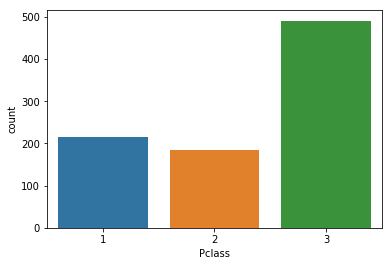

In [11]:
sns.countplot(x = 'Pclass', data=train)
train['Pclass'].value_counts()

Kita dapat melihat dalam grafik tersebut, penumpang paling banyak berada pada kelas nomor 3. Hal ini sangat masuk akal karena tentu saja kelas 3 memiliki harga yang lebih murah daripada kelas pertama dan kedua. Akan tetapi, yang menarik di sini adalah ternyata lebih banyak penumpang di kelas 1 dibandingkan dengan kelas 2

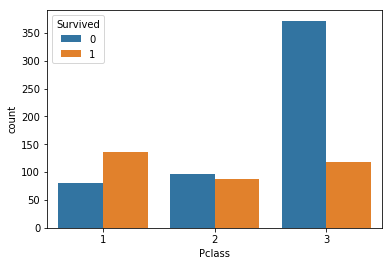

In [12]:
sns.countplot(x = 'Pclass', hue= 'Survived', data=train)

Dari grafik tersebut dapat dikatakan bahwa penumpang yang paling banyak selamat terdapat pada kelas 1. Sementara itu, penumpang pada kelas lebih banyak yang tidak selamat. Penumpang yang selamat pada kelas 1 bahkan lebih banyak dibandingkan dengan penumpang yang selamat di kelas 3. Hal ini menunjukan bahwa penumpang kelas 1 memang diprioritaskan untuk diselamatkan. Berdasarkan hal ini, feature Pclass akan digunakan dalam membangun model

In [13]:
#Menambahkan Pclass ke selected_df
selected_df['Pclass']=train['Pclass']
selected_df.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


### Name

In [14]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [15]:
len(train['Name'].unique())

891

Terdapat nilai unik dari Name sebanyak 891 data. Artinya setiap data memiliki nama yang unik. Sedikit sulit untuk menjadikan nama sebagai fitur yang akan digunakan sebagai model. Sebenarnya kita dapat mengakalinya dengan hanya mengambil status dari nama tersebut saja misalkan (Mr., Miss., Mrs., dll). Tetapi untuk mempersingkat proses EDA ini kita tidak akan menggunakan Feature Name ini

### Sex

In [16]:
len(train['Sex'].unique())

2

male      577
female    314
Name: Sex, dtype: int64

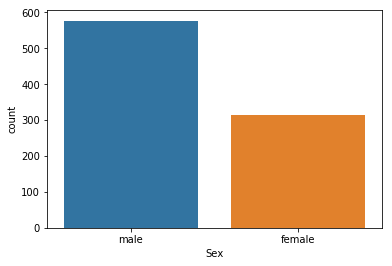

In [17]:
sns.countplot(x = 'Sex', data=train)
train['Sex'].value_counts()

Lebih banyak pria dibandingkan wanita yang terdapat di dalam kapal Titanic. Bahkan jumlah pria hampir dua kali dari jumlah wanita

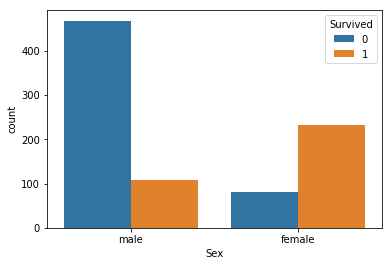

In [18]:
sns.countplot(x = 'Sex', hue= 'Survived', data=train)

Sangat menarik, ternyata meskipun jumlah wanita lebih sedikit. Tetapi jumlah wanita yang selamat lebih banyak dibandingkan dengan jumlah pria yang selamat. Hal ini menunjukan bahwa kolom Sex merupakan feature yang baik untuk digunakan dalam membuat model

In [19]:
#Menambahkan Sex ke selected_df
selected_df['Sex']=train['Sex']
selected_df.head()

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


### Age

In [20]:
train['Age'].isnull().sum()

177

Terdapat 177 data yang tidak memiliki nilai umur. Tentu saja hal ini tidak dapat dibiarkan apabila ingin menjadikan umur sebagai fitur yang digunakan dalam pemodelan. Bagaimana cara untuk mengatasinya? Kita dapat mengisikan nilai yang kosong dengan rata-rata umur dari data yang tidak kosong. Tetapi mungkin ini akan tidak relevan. Untuk mempermudah proses EDA pertama ini kita tidak akan menggunakan kolom data untuk pemodelannya.

### Sibsp

In [21]:
train['SibSp'].isnull().sum()

0

In [22]:
len(train['SibSp'].unique())

7

In [23]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

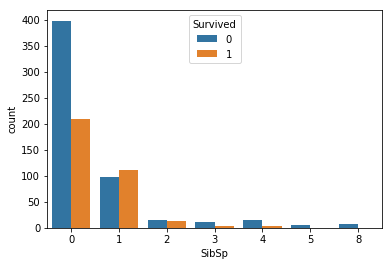

In [24]:
sns.countplot(x = 'SibSp', hue= 'Survived', data=train)

In [25]:
#Menambahkan SibSp ke selected_df
selected_df['SibSp']=train['SibSp']
selected_df.head()

,Survived,Pclass,Sex,SibSp
0,0,3,male,1
1,1,1,female,1
2,1,3,female,0
3,1,1,female,1
4,0,3,male,0


### Parch

In [26]:
train['Parch'].isnull().sum()

0

In [27]:
len(train['Parch'].unique())

7

In [28]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

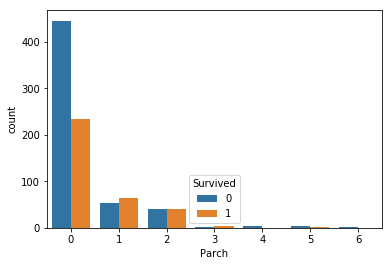

In [29]:
sns.countplot(x = 'Parch', hue= 'Survived', data=train)

In [30]:
#Menambahkan SibSp ke selected_df
selected_df['Parch']=train['Parch']
selected_df.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,male,1,0
1,1,1,female,1,0
2,1,3,female,0,0
3,1,1,female,1,0
4,0,3,male,0,0


### Ticket

In [31]:
train['Ticket'].isnull().sum()

0

In [32]:
len(train['Ticket'].unique())

681

Terdapat 681 data unik dari Tiket, terlalu banyak jenis data dari kolom ticket. Sehingga untuk saat ini, kolom tiket tidak akan ditambahkan ke dalam fitur yang akan digunakan sebagai model.

### Fare

In [33]:
train['Fare'].isnull().sum()

0

In [34]:
len(train['Fare'].unique())

248

Tidak ada data yang kosong (Nan) dan terdapat 248 nilai yang unik. Kita akan menggunakan feature fare

In [35]:
#Menambahkan Fare ke selected_df
selected_df['Fare']=train['Fare']
selected_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,male,1,0,7.2500
1,1,1,female,1,0,71.2833
2,1,3,female,0,0,7.9250
3,1,1,female,1,0,53.1000
4,0,3,male,0,0,8.0500


### Cabin

In [36]:
train['Cabin'].isnull().sum()

687

In [37]:
len(train['Cabin'].unique())

148

Terdapat 687 data yang tidak memiliki nilai! Selain itu, banyak sekali data unik dari cabin. Untuk model pertama kita, kita tidak akan menggunakan cabin sebagai feature di dalamnya. Mungkin untuk memperbaiki model kita nanti kita dapat mengisi data kosong dalam kolom cabin terlebih dahulu dan membuatnya menjadi hanya beberapa variabel saja

### Embarked

In [38]:
train['Embarked'].isnull().sum()

2

In [39]:
len(train['Embarked'].unique())

4

In [40]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Terdapat 2 data yang kosong. Data yang unik hanya ada 3 (4 di dalam data tersebut termasuk dengan data NaN). Untuk menggunakan feature Embarked ini, kita akan menghilangkan baris yang memiliki nilai Embarked == NaN

In [41]:
selected_df['Embarked'] = train['Embarked']
selected_df = selected_df.dropna(subset=['Embarked'])
len(selected_df)

889

Kita telah berhasil menghilangkan data NaN dalam embarked. Terlihat dari jumlah baris yang awalnya 891 menjadi 889.

In [42]:
selected_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


selected-df akan memiliki 7 kolom seperti ini. Feature-feature inilah yang akan kita gunakan dalam membangun model untuk memprediksi data test

## Feature Encoding

Sebelum data yang terpilih digunakan. Kita perlu membuat data-data categorical (Embarked, Sex dan Pclass) menjadi data numeric, agar dapat lebih mudah untuk dibangun modelnya. Kali ini, kita akan menggunakan OneHotEncoder untuk melakukannya

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
#Melakukan one hot encode terhadap data categorical
embarked_one_hot = pd.get_dummies(selected_df['Embarked'], prefix='embarked')
sex_one_hot = pd.get_dummies(selected_df['Sex'], prefix='sex')
pclass_one_hot = pd.get_dummies(selected_df['Pclass'], prefix='pclass')

In [45]:
#Menambahkan data one hot encode terhadap selected_df
selected_df_encode = pd.concat([selected_df, embarked_one_hot, sex_one_hot, pclass_one_hot] , axis=1)
selected_df_encode.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,3,male,1,0,7.2500,S,0,0,1,0,1,0,0,1
1,1,1,female,1,0,71.2833,C,1,0,0,1,0,1,0,0
2,1,3,female,0,0,7.9250,S,0,0,1,1,0,0,0,1
3,1,1,female,1,0,53.1000,S,0,0,1,1,0,1,0,0
4,0,3,male,0,0,8.0500,S,0,0,1,0,1,0,0,1


In [46]:
#Drop column Sex, Embarked, dan Pclass
selected_df_encode = selected_df_encode.drop(['Pclass', 'Sex', 'Embarked'], axis=1)
selected_df_encode.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


## Start Building Machine Learning Model
data yang telah kita buat telah melalui proses pemilihan feature yang digunakan, dan telah diubah seluruhnya menjadi numerik. Kita telah siap membangun model

In [47]:
df = selected_df_encode

In [48]:
#Split dataframe menjadi data dan label
X_train = df.drop('Survived', axis=1) #data
Y_train = df['Survived'] #label

In [49]:
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [50]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Menentukan Algoritma Machine Learning yang sesuai
kita akan mencoba menggunakan beberapa algoritma dalam kasus ini. Kita akan membuat terlebih dahulu sebuah fungsi untuk menggunakan algoritma tersebut agar kita tidak menuliskan terlalu banyak kode yang sama disetiap penggunaan algoritma

In [51]:
from sklearn import model_selection, metrics

In [52]:
#Membangun Fungsi untuk penggunaan algoritma machine learning
def algo_fit(algo, X_train, Y_train, cv):
    '''
    algo = nama algoritma yang digunakan
    cv = jumlah cross validation yang akan dilakukan
    '''
    #One Pass
    model = algo.fit(X_train, Y_train)
    acc = round(model.score(X_train, Y_train)*100, 2)
    
    #Cross Validation
    train_pred = model_selection.cross_val_predict(algo, X_train, Y_train, cv = cv, n_jobs = -1)
    
    #Cross Validation Accuracy Metrics
    acc_cv = round(metrics.accuracy_score(Y_train, train_pred)*100, 2)
    
    return train_pred, acc, acc_cv

In [53]:
import time
import datetime

### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
start_time = time.time()
train_perd_log, acc_log, acc_cv_log = algo_fit(LogisticRegression(), X_train, Y_train, 10)

log_time = (time.time() - start_time)
print(f'Accuracy = {acc_log}')
print(f'Accuracy CV 10 Fold = {acc_cv_log}')
print(f'Running Time = {datetime.timedelta(seconds=log_time)}')

/home/elga/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy = 79.98
Accuracy CV 10 Fold = 79.42
Running Time = 0:00:03.673357


### K-NN (K Nearest Neighbors)

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
start_time = time.time()
train_perd_knn, acc_knn, acc_cv_knn = algo_fit(KNeighborsClassifier(), X_train, Y_train, 10)

knn_time = (time.time() - start_time)
print(f'Accuracy = {acc_knn}')
print(f'Accuracy CV 10 Fold = {acc_cv_knn}')
print(f'Running Time = {datetime.timedelta(seconds=knn_time)}')

Accuracy = 83.46
Accuracy CV 10 Fold = 76.72
Running Time = 0:00:00.282820


### Gaussian Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB

In [59]:
start_time = time.time()
train_perd_gnb, acc_gnb, acc_cv_gnb = algo_fit(GaussianNB(), X_train, Y_train, 10)

gnb_time = (time.time() - start_time)
print(f'Accuracy = {acc_gnb}')
print(f'Accuracy CV 10 Fold = {acc_cv_gnb}')
print(f'Running Time = {datetime.timedelta(seconds=gnb_time)}')

Accuracy = 78.52
Accuracy CV 10 Fold = 77.95
Running Time = 0:00:00.304455


### Linear Support Vector Machine (SVC)

In [60]:
from sklearn.svm import LinearSVC

In [61]:
start_time = time.time()
train_perd_svc, acc_svc, acc_cv_svc = algo_fit(LinearSVC(), X_train, Y_train, 10)

svc_time = (time.time() - start_time)
print(f'Accuracy = {acc_svc}')
print(f'Accuracy CV 10 Fold = {acc_cv_svc}')
print(f'Running Time = {datetime.timedelta(seconds=svc_time)}')

/home/elga/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy = 77.62
Accuracy CV 10 Fold = 75.25
Running Time = 0:00:00.563999


### Stochastic Gradient Descent

In [62]:
from sklearn.linear_model import SGDClassifier

In [63]:
start_time = time.time()
train_perd_sgd, acc_sgd, acc_cv_sgd = algo_fit(SGDClassifier(), X_train, Y_train, 10)

sgd_time = (time.time() - start_time)
print(f'Accuracy = {acc_sgd}')
print(f'Accuracy CV 10 Fold = {acc_cv_sgd}')
print(f'Running Time = {datetime.timedelta(seconds=sgd_time)}')

Accuracy = 61.75
Accuracy CV 10 Fold = 69.29
Running Time = 0:00:00.177934


/home/elga/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


### Decision Tree Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
start_time = time.time()
train_perd_dt, acc_dt, acc_cv_dt = algo_fit(DecisionTreeClassifier(), X_train, Y_train, 10)

dt_time = (time.time() - start_time)
print(f'Accuracy = {acc_dt}')
print(f'Accuracy CV 10 Fold = {acc_cv_dt}')
print(f'Running Time = {datetime.timedelta(seconds=dt_time)}')

Accuracy = 92.46
Accuracy CV 10 Fold = 80.2
Running Time = 0:00:00.106200


### Gradient Boost Trees

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
start_time = time.time()
train_perd_gbt, acc_gbt, acc_cv_gbt = algo_fit(GradientBoostingClassifier(), X_train, Y_train, 10)

gbt_time = (time.time() - start_time)
print(f'Accuracy = {acc_gbt}')
print(f'Accuracy CV 10 Fold = {acc_cv_gbt}')
print(f'Running Time = {datetime.timedelta(seconds=gbt_time)}')

Accuracy = 86.61
Accuracy CV 10 Fold = 80.65
Running Time = 0:00:01.016411


## Model Result

In [68]:
model_result = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Gaussian Naive Bayes',
               'Linear Support Vector Machine/SVC', 'Stochastic Gradient Descent',
               'Decision Tree', 'Gradient Boost Tree'],
    'Score' : [acc_log, acc_knn, acc_gnb, acc_svc, acc_sgd, acc_dt, acc_gbt],
    'CV Score' : [acc_cv_log, acc_cv_knn, acc_cv_gnb, acc_cv_svc, acc_cv_sgd, acc_cv_dt, acc_cv_gbt]
})

In [69]:
model_result.sort_values('CV Score', ascending=False)

,Model,Score,CV Score
6,Gradient Boost Tree,86.61,80.65
5,Decision Tree,92.46,80.20
0,Logistic Regression,79.98,79.42
2,Gaussian Naive Bayes,78.52,77.95
1,KNN,83.46,76.72
3,Linear Support Vector Machine/SVC,77.62,75.25
4,Stochastic Gradient Descent,61.75,69.29


Dari semua model, model yang memiliki nilai Akurasi Cross Validation yang paling tiggi adalah Gradient Boost Tree. Kita memilih Akurasi Cross Validation bukan Akurasi dalam fit() karena Akurasi fit biasa dapat lebih tinggi dari nilai sebenarnya

## Feature Importance

In [94]:
def feature_importance(model, data):
    '''
    Fungsi yang digunakan untuk melihat feature mana yang paling menentukan prediksi dalam model yang digunakan
    Terdiri dari dua parameter yaitu:
    1. model = model apa yang digunakan
    2. data = data apa yang digunakan
    '''
    fea_imp = pd.DataFrame({
        'importance': model.feature_importances_, 'col':data.columns})
    fea_imp = fea_imp.sort_values(['importance', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind = 'barh', x='col', y='importance', figsize=(20,10))
    return fea_imp

,importance,col
9,0.000975,pclass_2
3,0.003246,embarked_C
4,0.004870,embarked_Q
5,0.017301,embarked_S
8,0.019836,pclass_1
0,0.022356,SibSp
1,0.033566,Parch
10,0.130416,pclass_3
6,0.140050,sex_female
2,0.244571,Fare


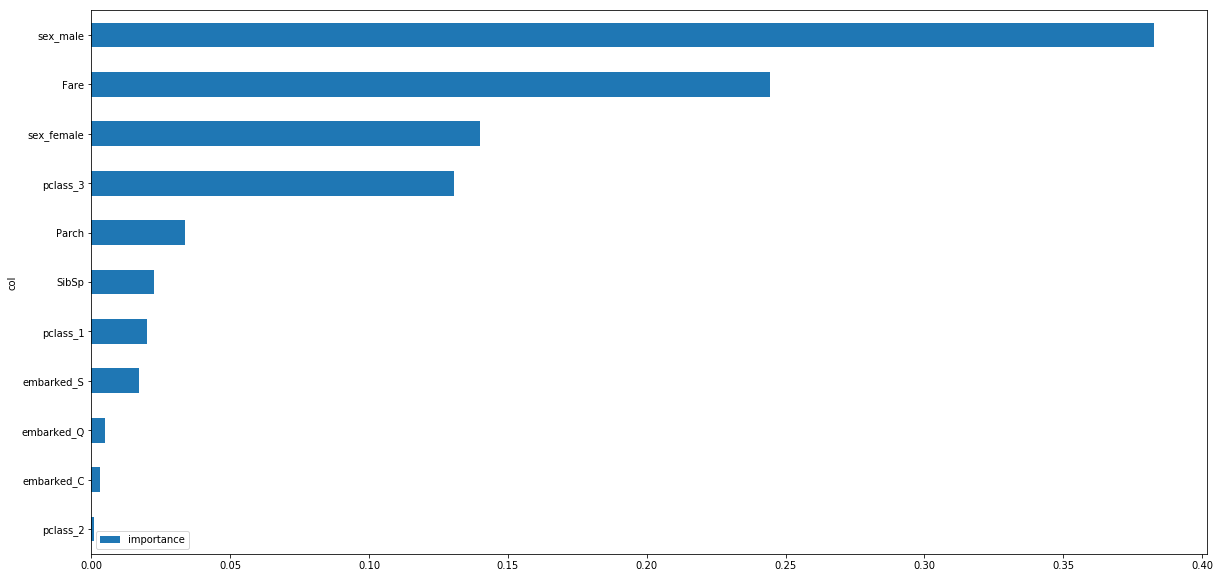

In [103]:
#Menggunakan model Gradient Boost Trees
gbt_model = GradientBoostingClassifier().fit(X_train, Y_train)
feature_importance(gbt_model, X_train)

Feature importance itu sangat penting untuk dapat menunjukan variabel-variabel apa saja yang berpengaruh terhadap model yang dibuat. Dalam model yang menggunakan Gradient Boost Trees ternyata variabel yang paling berpengaruh adalah sex_male. Dengan feature importance kita dapat mengubah variabel-variabel yang kurang berpengaruh sehingga menjadi lebih berpengaruh dan dapat meningkatkan akurasi dari model yang dibuat

## Submission

Sekarang waktunya untuk melakukan submission. Submission yang diperintahkan harus dalam bentuk data sebagai berikut:

In [141]:
gender_submission = pd.read_csv('data/gender_submission.csv')
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Data test yang kita miliki memiliki bentuk seperti ini

In [98]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Kita harus mengubah data tersebut seperti data pada X_train. Untuk kita perlu melakukan one hot encode pada data test agar bentuknya sama dengan data X_train

In [99]:
# Melakukan one hot encode terhadap data test seperti yang dilakukan pada data X_train
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [100]:
test = pd.concat([test, test_embarked_one_hot, test_sex_one_hot, test_plcass_one_hot], axis=1)

In [105]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.244019,0.110048,0.645933,0.363636,0.636364,0.255981,0.222488,0.521531
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.430019,0.313324,0.478803,0.481622,0.481622,0.436934,0.416416,0.500135
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


Sekarang data-data yang terdapat pada dataset test mengandung semua kolom yang terdapat di dalam X_train data. Selanjutnya, kita perlu untuk menyamakan urutan kolomnya dengan kolom X_train hal ini dapat dilakukan dengan cara berikut:

In [102]:
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

Kita harus melihat apakah ada data yang kosong dari data yang dibuat

In [127]:
test[wanted_test_columns].isnull().sum()

SibSp         0
Parch         0
Fare          1
embarked_C    0
embarked_Q    0
embarked_S    0
sex_female    0
sex_male      0
pclass_1      0
pclass_2      0
pclass_3      0
dtype: int64

Terdapat data yang kosong di dalam Fare sebanyak satu buah. Kita harus mengisinya dengan sesuatu. Dalam hal ini kita akan mengisinya dengan rata-rata dari Fare itu sendiri

In [128]:
df_test = test[wanted_test_columns]

In [129]:
df_test = df_test.fillna(test.mean())

In [130]:
len(df_test)

418

### Predictions
Melakukan prediksi terhadap data test yang sudah tidak ada data kosong

In [131]:
predictions = gbt_model.predict(df_test)

In [132]:
len(predictions)

418

Prediksi telah berhasil dibuat. Jumlah prediksi yang dibuat sebanyak 418 data. Jumlah ini sama dengan jumlah baris pada dataset test

In [133]:
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Selanjutnya, kita perlu membuat sebuah data frame dengan spesifikasi yang sama dengan data frame gender_submission

In [135]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Melakukan pengecekan apakah jumlah data gender_submission sama dengan submission yang kita buat

In [138]:
if len(gender_submission) == len(submission):
    print('The length is equal')
else:
    print('The length is not equal')

The length is equal


Mengekspor file csv yang sudah siap untuk dilakukan submission

In [139]:
submission.to_csv('submission_gradient_boost_trees.csv', index=False)